<a href="https://colab.research.google.com/github/KatherineElkins/programming-humanity-2025/blob/main/ml_dtree__Iris_Classification_20251101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Using a CART Decision Tree**

In this activity we will be using the well known Iris Species dataset [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) created in 1936 by botanist Ronald Fisher.  The dataset contains Sepal and Petal Length and Width measurements of three different Iris flower species *Iris setosa*, *Iris versicolor*, *Iris virginica*.  Throughout this activity we will use the measurements provided in the dataset to classify the different flower species using a CART decision tree.

* https://github.com/TrainingByPackt/Applied-Supervised-Learning-with-Python/

* Updated/Expanded 31 Oct 2022 by Jon Chun

* Modified by Katherine Elkins Nov 1 2025


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

## Load the Data
Load the Iris dataset using Pandas and examine the first 5 rows

In [ ]:
iris = load_iris()

In [ ]:
# What kind of object is 'iris'?



In [ ]:
# What does 'iris' object know/N  and do/V

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
iris.target[0]

0

In [ ]:
for i in range(len(iris.target))[:5]:
  print(f'Example #{i}:\n  features: {iris.data[i]}\n  label: {iris.target[i]}')

Example #0:
  features: [5.1 3.5 1.4 0.2]
  label: 0
Example #1:
  features: [4.9 3.  1.4 0.2]
  label: 0
Example #2:
  features: [4.7 3.2 1.3 0.2]
  label: 0
Example #3:
  features: [4.6 3.1 1.5 0.2]
  label: 0
Example #4:
  features: [5.  3.6 1.4 0.2]
  label: 0


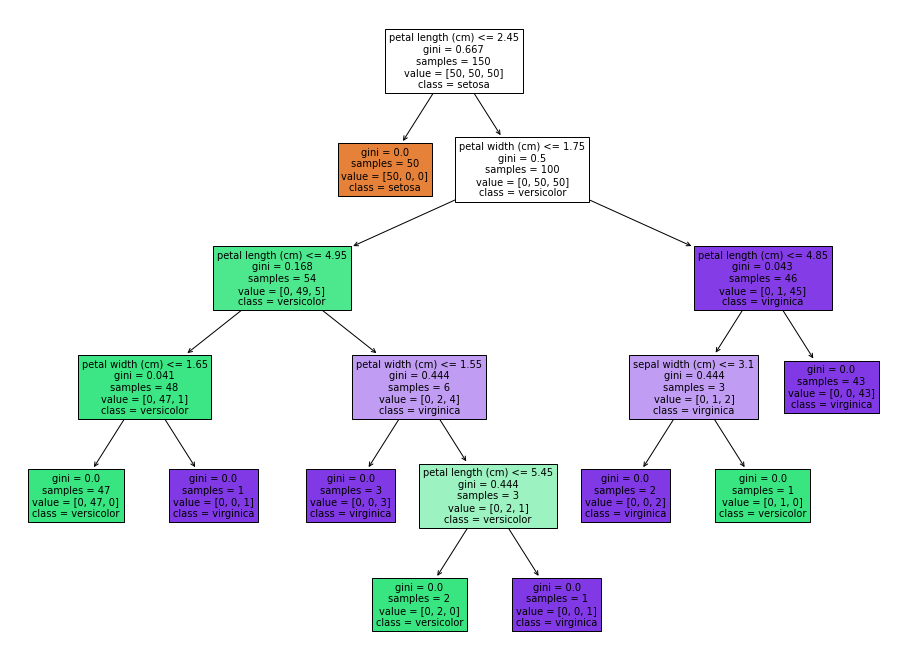

In [ ]:
# What is wrong with this approach?

X, y = iris.data, iris.target

clf = DecisionTreeClassifier()
clf.fit(X,y)

# print(tree.export_text(clf))
fig = plt.figure(figsize=(16,12))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [ ]:
# If you prefer working in Panda's DataFrames vs Numpy's array

# df = pd.read_csv('iris-data.csv')

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Train the model
Train the decision tree model using all available data.  **Remember that in practice decision trees tend to overfit the training set and thus cross validation should be used (see Lesson Six)**

As we have yet to cover cross validation we will extract a random sample of 10 rows to with-hold from training and will provide the data as "unseen" samples to get an idea of the performance of the Decision Tree.

In [ ]:
np.random.seed(10)
samples = np.random.randint(0, len(df), 10)
df_test = df.iloc[samples]
df = df.drop(samples)

In [ ]:
# Modify the previous code cell to get a 80/20 split



Fit the model

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)
model.score(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)

1.0

The model achieved 100% accuracy when compared against the training set.  Why is this?  Will this always occur for decision trees?

Compare against the test set:

In [ ]:
model.score(df_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df_test.Species)

1.0

## Visualising the Model

Depending on your system setup you may need to first install the graphviz package before you can visualise the decision tree.  With Anaconda you can enable and run the next cell to install graphviz

In [ ]:
!pip install python-graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df.columns[3]

'Petal Width'

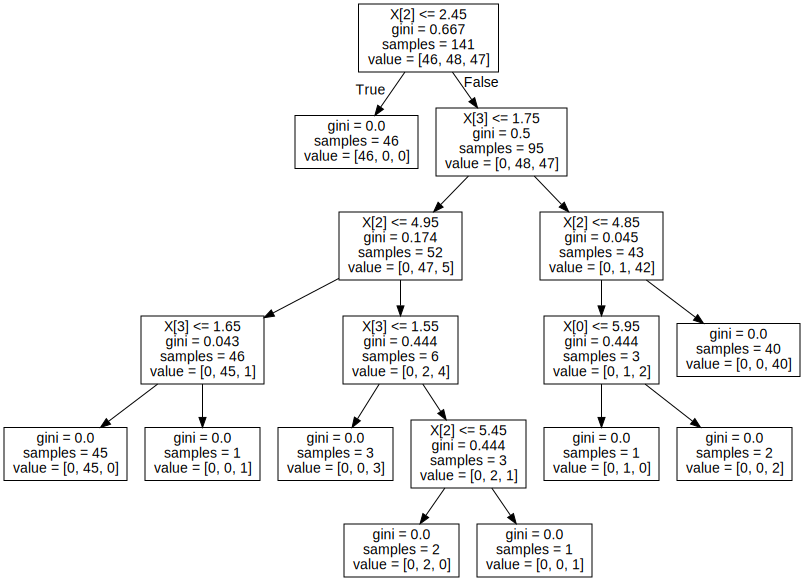

In [ ]:
dot_data = export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

# Concise Scikit Learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Output
# _ = tree.plot_tree(clf)



In [ ]:
# Output to PDF

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

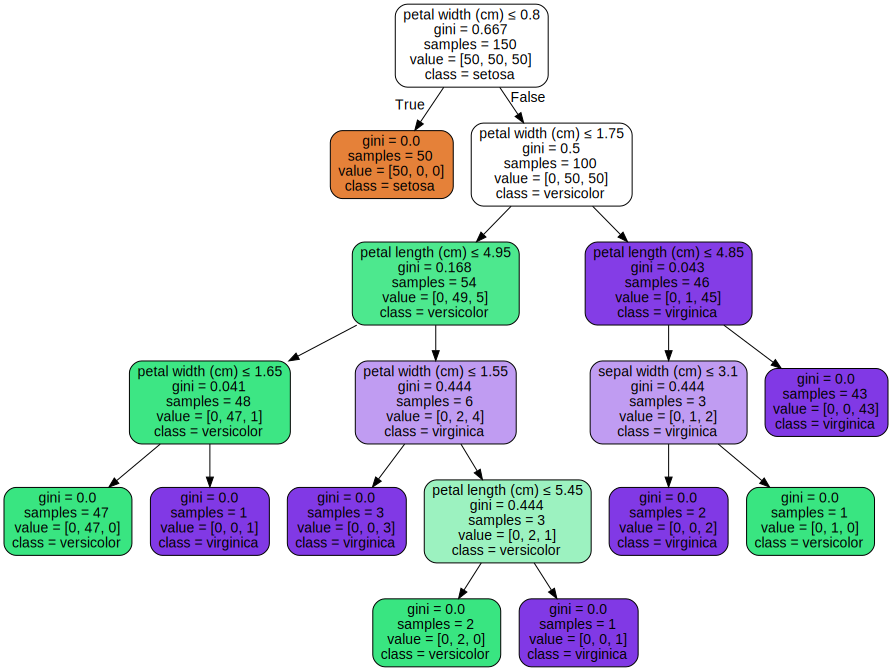

In [ ]:
# Output to screen

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph